# Text to Image

In [1]:
import base64
import io
import json
import os
import sys
import boto3
from PIL import Image

module_path = ".."
sys.path.append(os.path.abspath(module_path))

In [2]:
bedrock_runtime = boto3.client(
    service_name='bedrock-runtime', 
    aws_access_key_id=os.getenv('aws_access_key_id'),
    aws_secret_access_key=os.getenv('aws_secret_access_key'),
    region_name='us-west-2'
)

In [3]:
prompt = "a beautiful futuristic city"
negative_prompts = "poorly rendered, poor background details, deformed city, poorly drawn futuristic city, disfigured city features"
seed = 460000

In [8]:
def create_request_payload(prompt, negative_prompt_list, seed):
    
    payload_data = {
        "prompt": prompt,
        "negative_promptd": negative_prompt_list,
        "seed": seed,
    }
    
    return json.dumps(payload_data)

In [9]:
def execute_model(runtime, payload, model_identifier):
    response = runtime.invoke_model(body=payload, modelId=model_identifier)
    return json.loads(response.get("body").read())

In [10]:
request_payload = create_request_payload(prompt, negative_prompts, seed)

In [11]:
model_identifier = "stability.stable-image-core-v1:1"
runtime_response = execute_model(bedrock_runtime, request_payload, model_identifier)

ValidationException: An error occurred (ValidationException) when calling the InvokeModel operation: {"detail":"Invalid field 'negative_promptd' in request. Available fields for core are: prompt, negative_prompt, mode, strength, seed, output_format, image, aspect_ratio"}

In [76]:
image_base64_string = runtime_response["images"][0]

print(f"{image_base64_string[:80]}...")

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYG...


In [77]:
os.makedirs("data", exist_ok=True)
image_1 = Image.open(io.BytesIO(base64.decodebytes(bytes(image_base64_string, "utf-8"))))
image_1.save("data/image_1.png")

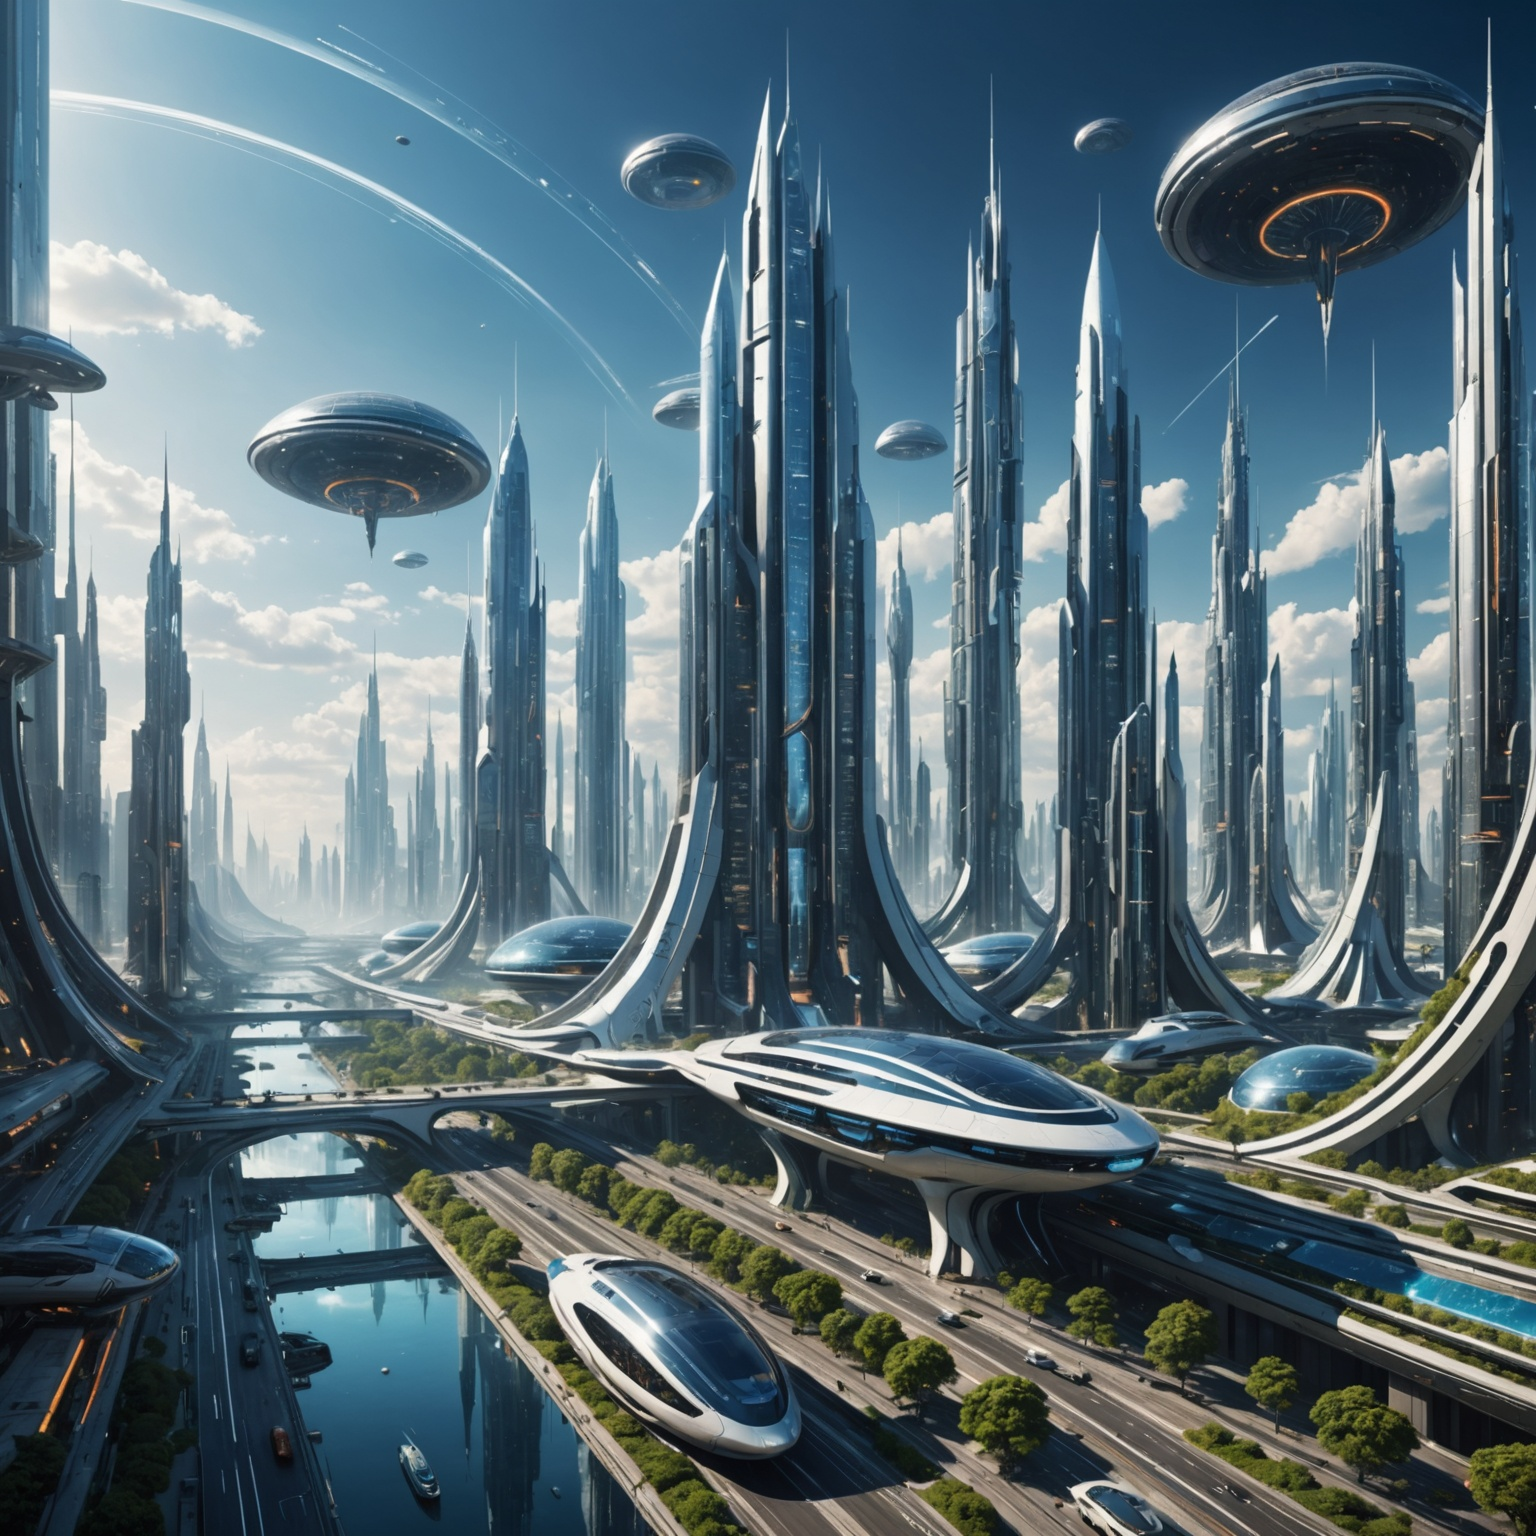

In [78]:
image_1